In [17]:
import numpy as np
import math

In [18]:
v_states = [
            [1,1,1,0,0,0,0,0,0],
            [0,0,0,1,1,1,0,0,0],
            [0,0,0,0,0,0,1,1,1],
            [1,0,0,1,0,0,1,0,0],
            [0,1,0,0,1,0,0,1,0],
            [0,0,1,0,0,1,0,0,1],
            [1,0,0,0,1,0,0,0,1],
            [0,0,1,0,1,0,1,0,0],
            ]

def check_victory(s):
    # s is a length 9 array
    x = s == 1
    o = s == 2
    sx = v_states @ x
    so = v_states @ o
    if sx.max() == 3:
        return 1
    elif so.max() == 3:
        return -1
    else:
        return 0

def check_victory_mat(s):
    # s is matrix of n x 9 dimension
    # matrix product with vicory states: s @ v = n x 9 @ 9 x 8 -> n x 8 
    # a value of 3 in the output means a victory 
    x = s == 1
    o = s == 2
    sx = v_states @ np.transpose(x)
    so = v_states @ np.transpose(o)
    sx = sx.max(axis = 0)
    so = so.max(axis = 0)
    sx = (sx == 3) * 1
    so = (so == 3) * -1
    return so + sx
   
s_test = np.array([[2,1,1,0,0,1,2,2,1],
                  [2,1,2,0,0,1,2,2,1],
                  [2,1,2,0,0,2,2,2,2]])
for s in s_test:
    print(check_victory(s))

check_victory_mat(s_test)    

1
0
-1


array([ 1,  0, -1])

In [19]:
def print_board(s):
    x = ['-', 'x', 'o']
    print(f' [{x[s[0]]} {x[s[1]]} {x[s[2]]}] \n [{x[s[3]]} {x[s[4]]} {x[s[5]]}] \n [{x[s[6]]} {x[s[7]]} {x[s[8]]}] \n')

def print_states(states):
    print(len(states)) 
    for s in states:
        print(len(s)) 

# get all tick tack toe states. 0 is empty, 1 is x and 2 is o
board = [0 for i in range(9)]
states = [[board]]
current_round_states = [board]
next_round_states = []
connections = []
current_connections = []
# iteration over all steps to fill the board
for i in range(9):
    #iteration over all states of the previous step
    for j, s in enumerate(current_round_states):
        # check if the step is even. If yes, add a x otherwise an o
        if i % 2 == 0:
            x = 1
        else:
            x = 2    
        # go through all fields
        c = []
        # check if state was victorios. Only calculate next states if the state wasn't victorios 
        if check_victory(np.array(s)) == 0:
            for k in range(9):
                new_state = list(s).copy()
                # check if field is taken
                if s[k] == 0:
                    new_state[k] = x
                    if new_state in next_round_states:
                        c.append(next_round_states.index(new_state))
                    else:
                        next_round_states.append(new_state)
                        c.append(next_round_states.index(new_state))
        current_connections.append(c)
    connections.append(current_connections)
    current_connections = []
    states.append(next_round_states)
    # remove states that won from the next round
    victories = check_victory_mat(np.array(next_round_states))
    current_round_states = np.array(next_round_states)
    next_round_states = []

    
print_states(states)
print('\n')
print_states(connections)

10
1
9
72
252
756
1260
1520
1140
390
78


9
1
9
72
252
756
1260
1520
1140
390


In [20]:
V = []
for s in states[0:]:
    V.append(np.random.rand(len(s)))

print_states(V)


10
1
9
72
252
756
1260
1520
1140
390
78


In [21]:
gamma = 0.5
def calc_V(V, turn, i, verbose = False):

    actions = connections[turn][i] 
    V_new = []
    for a in actions:
        s = states[turn + 1][a]
        reward = check_victory(np.array(s))
        if reward == 0 and turn != 8:
            V_new.append( gamma * V[turn + 1][a])

        else:
            V_new.append(reward)
    
    if verbose == True:
        print(V_new)
    
    if turn%2 == 0:
        V_max = max(V_new)
        a = np.argmax(V_new)
    if turn%2 != 0:
        V_max = min(V_new)
        a = np.argmin(V_new)    

        
    return V_max, actions[a]

In [22]:
turn = 4
state_index = 49
V_new, a_best = calc_V(V, turn,state_index,verbose=True)
print(V[turn][state_index])
print_board(states[turn][state_index])
print(V_new, a_best)
print_board(states[turn + 1][a_best])
for a in connections[turn][state_index]:
    print(a)
    print_board(states[turn + 1][a])

[np.float64(0.3499791762672303), np.float64(0.023084372275366583), 1, np.float64(0.43979564219108763), np.float64(0.07962832928243418)]
0.9817154367192117
 [x - o] 
 [x - o] 
 [- - -] 

1 140
 [x - o] 
 [x - o] 
 [x - -] 

115
 [x x o] 
 [x - o] 
 [- - -] 

139
 [x - o] 
 [x x o] 
 [- - -] 

140
 [x - o] 
 [x - o] 
 [x - -] 

141
 [x - o] 
 [x - o] 
 [- x -] 

142
 [x - o] 
 [x - o] 
 [- - x] 



In [23]:


def play_game(V, verbose = False):
    a = 0
    for t in range(9):
        s = states[t][a]
        reward = check_victory(np.array(s))
        if verbose:
            print(f'{t=}, {a=}')
            print_board(s)
        if reward != 0:
            return reward    
        if t%2 != 0:
            next_moves = connections[t][a]
            a = np.random.choice(next_moves)
        if t%2 == 0:
            V_new, a = calc_V(V, t,a)

    return 0


n = 1000
rewards = sum([play_game(V) for i in range(n)])/n
print(rewards)

0.543


In [24]:
gamma = 0.5 # discount for future rewards
epsilon = 1.0 # epsilon determines the exploration of not optimal actions. Higher epsilon = more exploration. between 0 and 1

def choose_next_action(best_action, possible_actions):
    if np.random.random_sample() < epsilon:
        action = np.random.choice(possible_actions)
    else: 
        action = best_action
    return action

def assign_V(V, V_new, turn, state_index):
    residuum = np.abs(V[turn][state_index] - V_new)
    V[turn][state_index] = V_new
    return residuum

def initialize_V():
    V = []
    for s in states[0:]:
        V.append(np.zeros(len(s)))  
    return V      

def iterate_V(V):
    state_index = 0 # innitial starting board
    for turn in np.arange(0,9):
        possible_actions = connections[turn][state_index]
        V_new, best_action = calc_V(V, turn, state_index)
        V[turn][state_index] = V_new
        if turn%2 == 0:
            action = choose_next_action(best_action, possible_actions)    
        else: 
            action = np.random.choice(possible_actions)
        state_index = action
        if check_victory(np.array(states[turn + 1][action])) != 0:
            break  
    return V

V = initialize_V()
Rout = []
for i in range(10000):
    residuum = []
    V = iterate_V(V)
    if i%100 == 0:
        n = 500
        rewards = sum([play_game(V) for i in range(n)])/n
        Rout.append(rewards)
        print(rewards)

0.736
0.702
0.788
0.76
0.732
0.73
0.764
0.758
0.702
0.744
0.79
0.816
0.834
0.842
0.828
0.802
0.844
0.834
0.83
0.836
0.848
0.866
0.844
0.854
0.824
0.82
0.844
0.812
0.866
0.842
0.82
0.894
0.914
0.868
0.898
0.916
0.888
0.898
0.884
0.942
0.978
0.946
0.996
0.992
0.998
0.992
0.998
0.994
0.998
0.992
0.994
0.994
0.998
1.0
0.994
0.998
0.992
0.99
0.992
0.992
0.994
0.996
0.998
0.986
0.996
0.994
0.996
0.994
0.994
1.0
0.998
0.996
0.994
0.996
0.99
0.994
0.998
0.996
0.998
0.994
0.996
0.996
0.996
0.996
0.992
1.0
0.998
0.996
0.998
0.998
1.0
0.996
0.99
0.998
0.992
0.992
0.996
0.994
0.996
0.998


Text(0, 0.5, 'score')

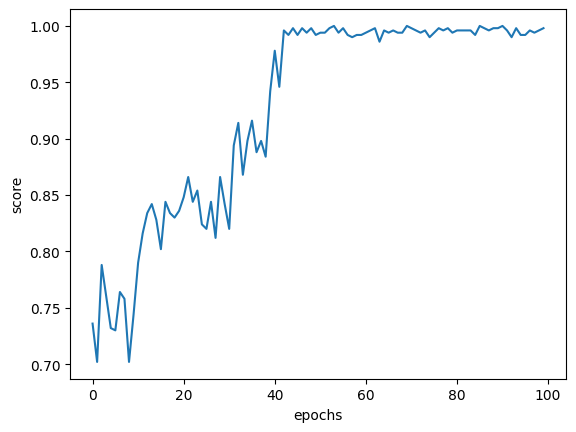

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(Rout)
ax.set_xlabel('epochs')
ax.set_ylabel('score')



In [26]:
play_game(V, verbose=True)

t=0, a=0
 [- - -] 
 [- - -] 
 [- - -] 

t=1, a=0
 [x - -] 
 [- - -] 
 [- - -] 

t=2, a=np.int64(7)
 [x - -] 
 [- - -] 
 [- - o] 

t=3, a=50
 [x - x] 
 [- - -] 
 [- - o] 

t=4, a=np.int64(5)
 [x o x] 
 [- - -] 
 [- - o] 

t=5, a=28
 [x o x] 
 [- - -] 
 [x - o] 

t=6, a=np.int64(59)
 [x o x] 
 [- - -] 
 [x o o] 

t=7, a=80
 [x o x] 
 [x - -] 
 [x o o] 



1

In [27]:
import pickle

save_dict = {'states':states,
             'connections': connections,
             'valuetable': V}

with open('TTT_model.pkl', 'wb') as f:  # open a text file
    pickle.dump(save_dict, f) # serialize the list
f.close()
